In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
df= pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


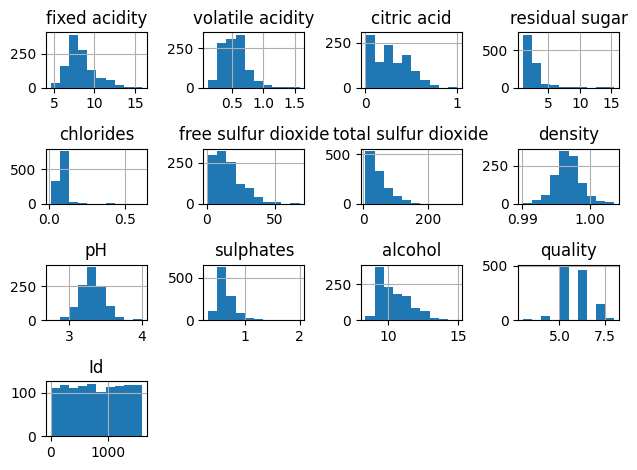

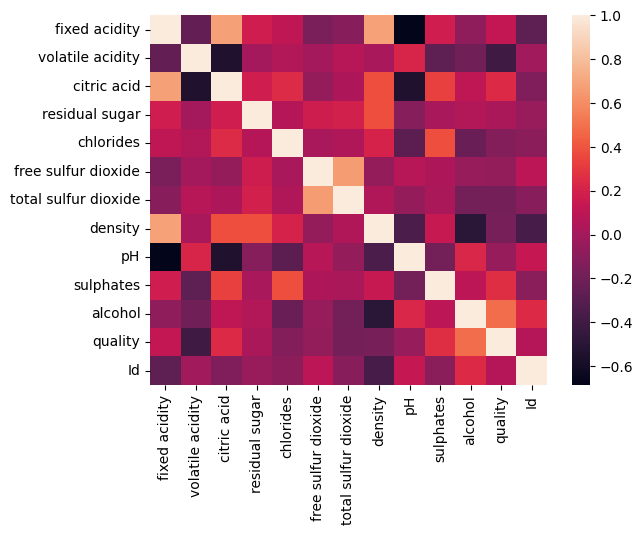

In [37]:
#statistical info
df.describe()
#histogram
df.hist()
plt.tight_layout()
plt.show()
#correlation
sns.heatmap(df.corr())
plt.show()


In [38]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Preprocessing the dataset

In [39]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [40]:
#if missing cases exists, unlike in this
for col,value in df.items():
    if value.isnull().sum()>1: #col != 'type'
        df[col] = df[col].fillna(df[col].mean())


Exploratory Data Analysis

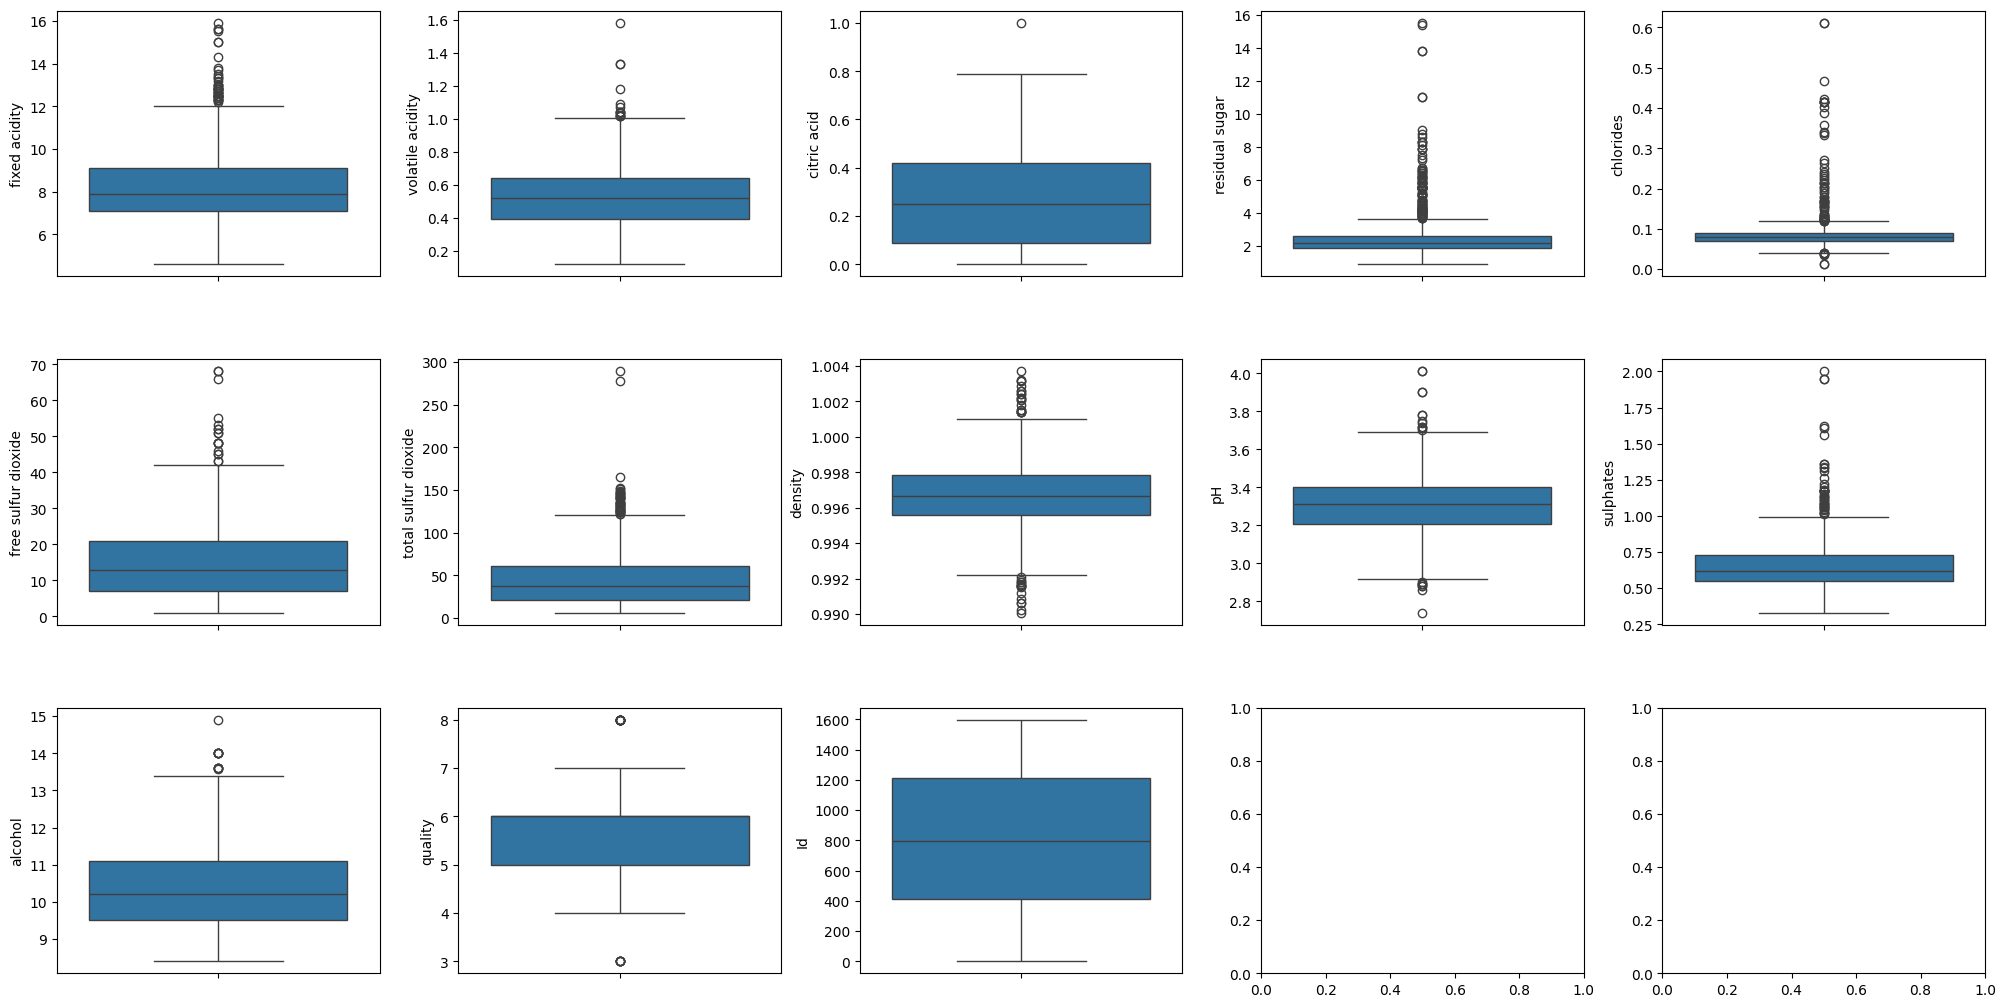

In [41]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(nrows=3,ncols=5,figsize=(20,10))
ax=ax.flatten()
index=0
for col,value in df.items():
    if col!='type':
        sns.boxplot(y=col,data=df,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
plt.show()

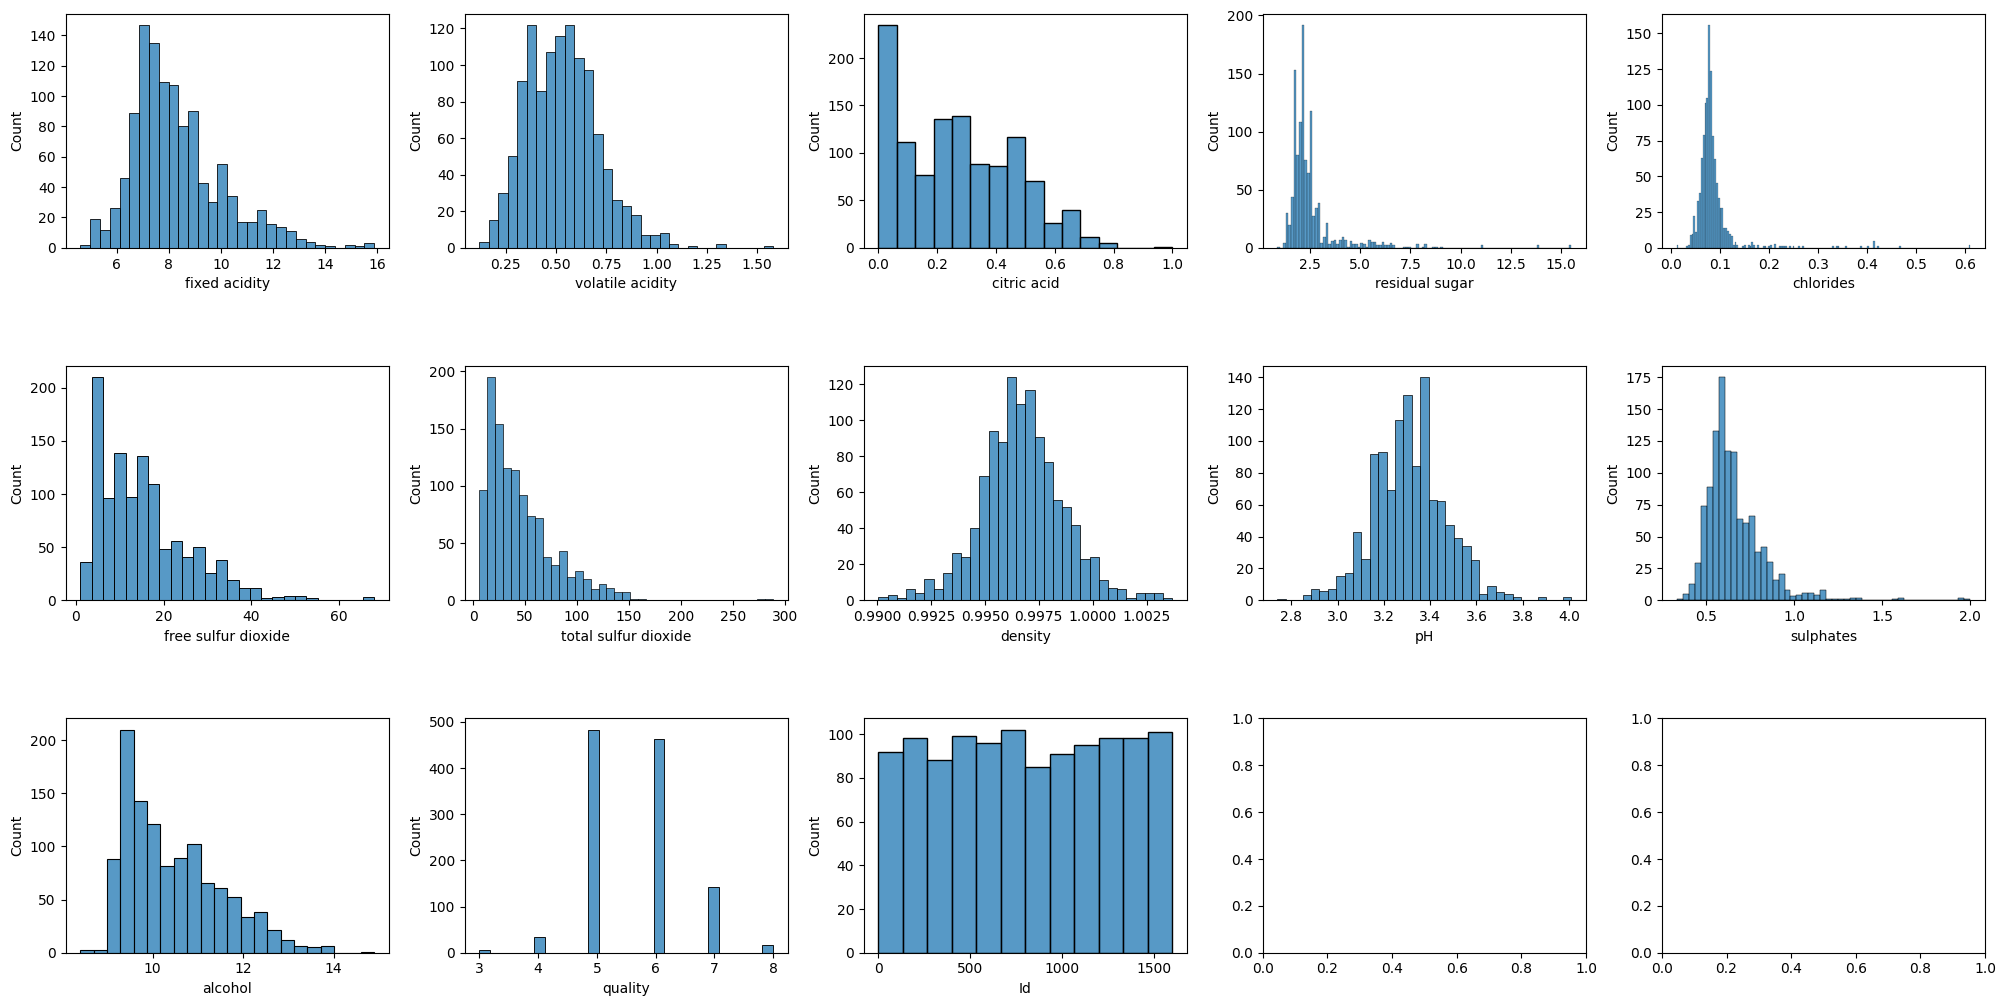

In [42]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.histplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

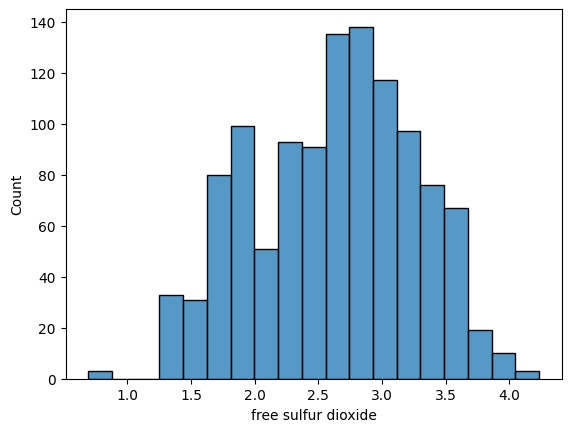

In [43]:
# log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

sns.histplot(df['free sulfur dioxide'])



Coorelation matrix

<Axes: >

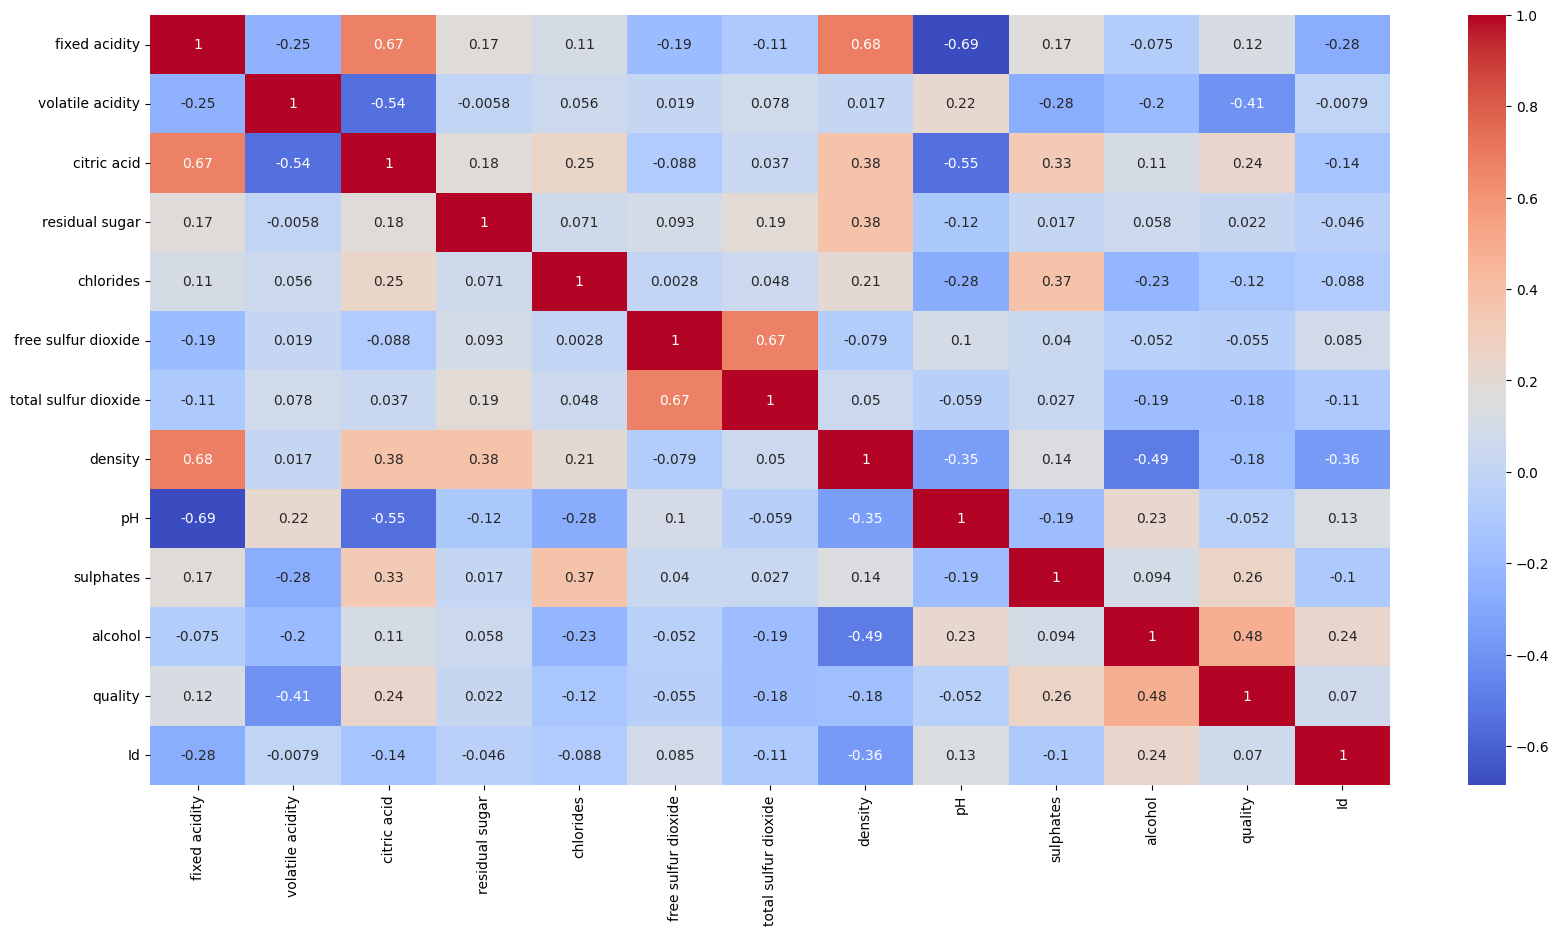

In [44]:
corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

Input Split

In [45]:
X = df.drop(columns=['quality'])
y = df['quality']

Class Imbalancement

In [46]:
y.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
oversample = SMOTE(k_neighbors=4)
X,y = oversample.fit_resample(X,y)

In [48]:
y.value_counts()

quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64

Model training

In [51]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model,X,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy",model.score(x_test,y_test))

    score = cross_val_score(model,X,y,cv=5)
    print("Cross validation score: ",np.mean(score))

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy 0.33793103448275863
Cross validation score:  0.3071115478530165


In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy 0.7544827586206897
Cross validation score:  0.7091286998987553


In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy 0.863448275862069
Cross validation score:  0.7657125841224466


In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy 0.8786206896551724
Cross validation score:  0.7691549044130784
